In [3]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten

In [4]:
X_train = np.loadtxt('input.csv',delimiter=',')
Y_train = np.loadtxt('labels.csv',delimiter=',')

X_test = np.loadtxt('input_test.csv',delimiter=',')
Y_test = np.loadtxt('labels_test.csv',delimiter=',')

In [6]:
print("Shape of X-train",X_train.shape)
print("Shape of Y-train",Y_train.shape)
print("Shape of X-test",X_test.shape)
print("Shape of Y-test",Y_test.shape)

Shape of X-train (2000, 30000)
Shape of Y-train (2000,)
Shape of X-test (400, 30000)
Shape of Y-test (400,)


In [9]:
X_train = X_train.reshape(len(X_train),100,100,3)
Y_train = Y_train.reshape(len(Y_train),1)

X_test = X_test.reshape(len(X_test),100,100,3)
Y_test = Y_test.reshape(len(Y_test),1)

X_train = X_train/255
X_test = X_test/255

In [10]:
print("Shape of X-train",X_train.shape)
print("Shape of Y-train",Y_train.shape)
print("Shape of X-test",X_test.shape)
print("Shape of Y-test",Y_test.shape)

Shape of X-train (2000, 100, 100, 3)
Shape of Y-train (2000, 1)
Shape of X-test (400, 100, 100, 3)
Shape of Y-test (400, 1)


In [13]:
pip install matplotlib

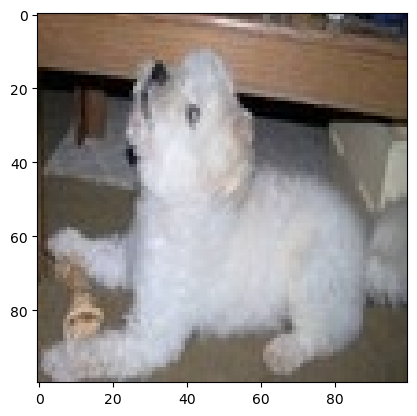

In [15]:
import random
import matplotlib.pyplot as plt  # Import the plt module

idx = random.randint(0, len(X_train))
plt.imshow(X_train[idx, :])
plt.show()


In [17]:
model = Sequential([
    Conv2D(32,(3,3),activation='relu',input_shape=(100,100,3)),
    MaxPooling2D((2,2)),
    
    Conv2D(32,(3,3),activation='relu'),
    MaxPooling2D((2,2)),
    
    Flatten(),
    Dense(64,activation = 'relu'),
    Dense(1,activation='sigmoid')
])

In [33]:
model = Sequential()

model.add(Conv2D(32,(3,3),activation='relu',input_shape=(100,100,3)))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D((2,2)))
          
model.add(Flatten())
model.add(Dense(64,activation = 'relu'))
model.add(Dense(1,activation='sigmoid'))

In [34]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [24]:
model.add(Dense(1, activation='sigmoid'))

In [65]:
model.fit(X_train, Y_train, epochs=25, validation_split = 0.2)

Epoch 1/25
50/50 [==============================] - 13s 245ms/step - loss: 0.4445 - accuracy: 0.7869 - val_loss: 0.7501 - val_accuracy: 0.5125
Epoch 2/25
50/50 [==============================] - 9s 185ms/step - loss: 0.3472 - accuracy: 0.8500 - val_loss: 0.5310 - val_accuracy: 0.7550
Epoch 3/25
50/50 [==============================] - 8s 151ms/step - loss: 0.2618 - accuracy: 0.8969 - val_loss: 0.6173 - val_accuracy: 0.7275
Epoch 4/25
50/50 [==============================] - 7s 136ms/step - loss: 0.1850 - accuracy: 0.9325 - val_loss: 1.2674 - val_accuracy: 0.5050
Epoch 5/25
50/50 [==============================] - 7s 133ms/step - loss: 0.1480 - accuracy: 0.9475 - val_loss: 0.9261 - val_accuracy: 0.6275
Epoch 6/25
50/50 [==============================] - 7s 132ms/step - loss: 0.0952 - accuracy: 0.9681 - val_loss: 0.6008 - val_accuracy: 0.7850
Epoch 7/25
50/50 [==============================] - 7s 144ms/step - loss: 0.0656 - accuracy: 0.9800 - val_loss: 1.0003 - val_accuracy: 0.6925
Epoch

In [66]:
model.evaluate(X_test,Y_test)

13/13 [==============================] - 1s 38ms/step - loss: 2.1137 - accuracy: 0.6550


[2.113706588745117, 0.6549999713897705]

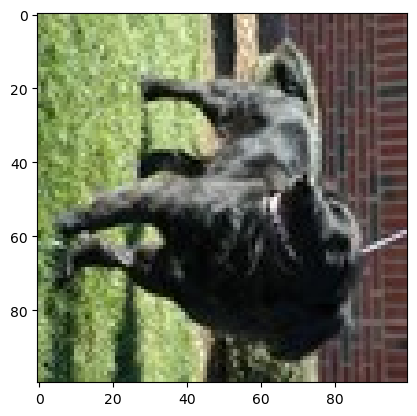

1/1 [==============================] - 0s 58ms/step
[[3.6830357e-08]]
Our model says its a dog


In [72]:
idx2 = random.randint(0, len(Y_test) - 1)  # Adjust the range to prevent index out of bounds
plt.imshow(X_test[idx2, :])
plt.show()

y_pred = model.predict(X_test[idx2, :].reshape(1, 100, 100, 3))
print(y_pred)
if(y_pred > 0.8):
    print("Our model says its a cat")
else:
    print("Our model says its a dog")